# Random Walk Testing (Linear Regression) - Small Scale

In [1]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statistics
from tqdm import tqdm
import random
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### DataFrame Load & Munging

In [4]:
#Loading our team level regular box score dataframe
regularBoxScoreDF = pd.read_excel('../DataScience_Pipeline/RawDataFiles/teamRegularBoxScoreGamelogs.xlsx')
#Loading our team level advanced box score dataframe
advancedBoxScoreDF = pd.read_excel('../DataScience_Pipeline/RawDataFiles/teamAdvancedBoxScoreGamelogs.xlsx')

In [6]:
# Subtracting fields from our regular box score dataframe that we dont need
regularBoxScoreDF = regularBoxScoreDF[[
    'Date',
    'Team',
    'Team_Points'
    
]]
# Subtracting fields from our advanced box score dataframe that we dont need
advancedBoxScoreDF = advancedBoxScoreDF[[
    'Date',
    'Team',
    'Pace',
    'Offensive_EFG',
    'OffensiveRating',
    'TrueShootingRate'
    
]]

# Team 1 DataFrame Join
Merged_df = pd.merge(regularBoxScoreDF, advancedBoxScoreDF, on=['Date','Team'], how='left')
#Below line commented out for larger scale testing
#Merged_df = Merged_df[Merged_df['Team']=='BOS']

predictors = [
      
                'Pace',
                'Offensive_EFG',
                'OffensiveRating',
                'TrueShootingRate'    
            ]

In [86]:
TrainingData = Merged_df[Merged_df['Date']<'2023-10-26']


### NBA Team Testing

In [89]:
# Creating a list of game dates for PHI

# Season 2024 filter
#TargetDayList = Merged_df[Merged_df['Date']>'2023-10-26']['Date'].to_list()
# Season 2023 filter
#TargetDayList = Merged_df[(Merged_df['Date']>='2022-10-26') & (Merged_df['Date']<'2023-10-26')]['Date'].to_list()

# Season 2022 filter
#TargetDayList = Merged_df[(Merged_df['Date']>='2021-10-26') & (Merged_df['Date']<'2022-10-26')]['Date'].to_list()

In [91]:
predictionMean = []
DateList = []
TeamList = []
TeamPointsList = []


TestList = [
            'MIL','TOR','BOS','IND'
           ,'MIA','PHI','BRK','ORL'
           ,'CHO','WAS','CHI','NYK'
           ,'DET','ATL','CLE','LAL'
           ,'LAC','DEN','HOU','OKC'
           ,'UTA','DAL','POR','MEM'
           ,'PHO','SAS','SAC','NOP'
           ,'MIN','GSW'
           ]

In [93]:
#test = Merged_df[Merged_df['Team']=='MIL']

In [95]:
#test['z_score'] = (test['Team_Points'] - test['Team_Points'].mean()) / test['Team_Points'].std()

In [97]:
#test['outlier'] = test['z_score'].abs() > 1

In [99]:
#test = test[test['outlier']==False]

In [101]:
#test

In [103]:
for team in tqdm(TestList):
    TestingDataset_df = Merged_df[Merged_df['Team']==team]
    TargetDayList = TestingDataset_df[(TestingDataset_df['Date']>='2023-10-26') & (TestingDataset_df['Date']<'2024-10-26')]['Date'].to_list()
    ##### - NEW CODE to account for outlier handling #####
    TestingDataset_df['z_score'] = (TestingDataset_df['Team_Points'] - TestingDataset_df['Team_Points'].mean()) / TestingDataset_df['Team_Points'].std()
    TestingDataset_df['outlier'] = TestingDataset_df['z_score'].abs() > 1
    TestingDataset_df = TestingDataset_df[TestingDataset_df['outlier']==False]
    ##### - END of Outlier Hnadling Code #####
    
    for day in TargetDayList:
        TargetFrameForBinning = TestingDataset_df[TestingDataset_df['Date'] < day].tail(7)
        histTS, binsTS = np.histogram(TargetFrameForBinning['TrueShootingRate'], bins=10)
        histPace, binsPace = np.histogram(TargetFrameForBinning['Pace'], bins=10)
        histEFG, binsEFG = np.histogram(TargetFrameForBinning['Offensive_EFG'], bins=10)
        histRATE, binsRATE = np.histogram(TargetFrameForBinning['OffensiveRating'], bins=10)

        randomListTrue =[]
        randomListPace =[]
        randomListEFG =[]
        randomListRate =[]

        for x in range(histTS[0]):
            randomListTrue.append(random.uniform(binsTS[0],binsTS[1]))   
        for x in range(histTS[1]):
            randomListTrue.append(random.uniform(binsTS[1],binsTS[2]))   
        for x in range(histTS[2]):
            randomListTrue.append(random.uniform(binsTS[2],binsTS[3]))   
        for x in range(histTS[3]):
            randomListTrue.append(random.uniform(binsTS[3],binsTS[4]))   
        for x in range(histTS[4]):
            randomListTrue.append(random.uniform(binsTS[4],binsTS[5]))   
        for x in range(histTS[5]):
            randomListTrue.append(random.uniform(binsTS[5],binsTS[6]))   
        for x in range(histTS[6]):
            randomListTrue.append(random.uniform(binsTS[6],binsTS[7]))
        for x in range(histTS[7]):
            randomListTrue.append(random.uniform(binsTS[7],binsTS[8]))
        for x in range(histTS[8]):
            randomListTrue.append(random.uniform(binsTS[8],binsTS[9]))   
        for x in range(histTS[9]):
            randomListTrue.append(random.uniform(binsTS[9],binsTS[10]))

        for x in range(histPace[0]):
            randomListPace.append(random.uniform(binsPace[0],binsPace[1]))   
        for x in range(histPace[1]):
            randomListPace.append(random.uniform(binsPace[1],binsPace[2]))   
        for x in range(histPace[2]):
            randomListPace.append(random.uniform(binsPace[2],binsPace[3]))   
        for x in range(histPace[3]):
            randomListPace.append(random.uniform(binsPace[3],binsPace[4]))   
        for x in range(histPace[4]):
            randomListPace.append(random.uniform(binsPace[4],binsPace[5]))   
        for x in range(histPace[5]):
            randomListPace.append(random.uniform(binsPace[5],binsPace[6]))   
        for x in range(histPace[6]):
            randomListPace.append(random.uniform(binsPace[6],binsPace[7]))
        for x in range(histPace[7]):
            randomListPace.append(random.uniform(binsPace[7],binsPace[8]))
        for x in range(histPace[8]):
            randomListPace.append(random.uniform(binsPace[8],binsPace[9]))   
        for x in range(histPace[9]):
            randomListPace.append(random.uniform(binsPace[9],binsPace[10]))      

        for x in range(histEFG[0]):
            randomListEFG.append(random.uniform(binsEFG[0],binsEFG[1]))   
        for x in range(histEFG[1]):
            randomListEFG.append(random.uniform(binsEFG[1],binsEFG[2]))   
        for x in range(histEFG[2]):
            randomListEFG.append(random.uniform(binsEFG[2],binsEFG[3]))   
        for x in range(histEFG[3]):
            randomListEFG.append(random.uniform(binsEFG[3],binsEFG[4]))   
        for x in range(histEFG[4]):
            randomListEFG.append(random.uniform(binsEFG[4],binsEFG[5]))   
        for x in range(histEFG[5]):
            randomListEFG.append(random.uniform(binsEFG[5],binsEFG[6]))   
        for x in range(histEFG[6]):
            randomListEFG.append(random.uniform(binsEFG[6],binsEFG[7]))
        for x in range(histEFG[7]):
            randomListEFG.append(random.uniform(binsEFG[7],binsEFG[8]))
        for x in range(histEFG[8]):
            randomListEFG.append(random.uniform(binsEFG[8],binsEFG[9]))   
        for x in range(histEFG[9]):
            randomListEFG.append(random.uniform(binsEFG[9],binsEFG[10]))

        for x in range(histRATE[0]):
            randomListRate.append(random.uniform(binsRATE[0],binsRATE[1]))   
        for x in range(histRATE[1]):
            randomListRate.append(random.uniform(binsRATE[1],binsRATE[2]))   
        for x in range(histRATE[2]):
            randomListRate.append(random.uniform(binsRATE[2],binsRATE[3]))   
        for x in range(histRATE[3]):
            randomListRate.append(random.uniform(binsRATE[3],binsRATE[4]))   
        for x in range(histRATE[4]):
            randomListRate.append(random.uniform(binsRATE[4],binsRATE[5]))   
        for x in range(histRATE[5]):
            randomListRate.append(random.uniform(binsRATE[5],binsRATE[6]))   
        for x in range(histRATE[6]):
            randomListRate.append(random.uniform(binsRATE[6],binsRATE[7]))
        for x in range(histRATE[7]):
            randomListRate.append(random.uniform(binsRATE[7],binsRATE[8]))
        for x in range(histRATE[8]):
            randomListRate.append(random.uniform(binsRATE[8],binsRATE[9]))   
        for x in range(histRATE[9]):
            randomListRate.append(random.uniform(binsRATE[9],binsRATE[10]))

        unique_combinations = []

        for k in range(len(randomListPace)):
            for l in range(len(randomListEFG)):
                for m in range(len(randomListRate)):
                    for n in range(len(randomListTrue)):
                        unique_combinations.append((randomListPace[k],randomListEFG[l],randomListRate[m],randomListTrue[n]))
        X_train, X_test, y_train, y_test = train_test_split(TrainingData[predictors], TrainingData['Team_Points'])
        lr = LinearRegression()
        lr.fit(X_train,y_train)                    
        predictions = []
        for combo in unique_combinations:
            test_params = {'Pace':combo[0],
                           'Offensive_EFG':combo[1],
                           'OffensiveRating':combo[2],
                           'TrueShootingRate':combo[3],
                               }
            #Creating the test dataframe
            TestingData = pd.DataFrame(test_params, columns=['Pace'
                                                             ,'Offensive_EFG'
                                                             ,'OffensiveRating'
                                                             ,'TrueShootingRate'
                                                            ],index=[0]
                                      )
            # Creating our predictions
            y_pred=lr.predict(TestingData[predictors])
            predictions.append(y_pred[0])               
        hist, bins = np.histogram(predictions, bins=10)
        #predictionsLowerBound.append(bins[0])
        #predictionsUpperBound.append(bins[-1])
        mean = sum(predictions)/len(predictions)
       
        predictionMean.append(mean)#
       
        DateList.append(day)
        TeamList.append(team)

100%|██████████| 30/30 [1:33:12<00:00, 186.40s/it]


In [107]:
ResultsFrame = pd.DataFrame({
                            'Date': DateList,
                            'Team': TeamList,
                            'Mean Prediction':predictionMean,
                            



})

In [109]:
ResultsFrame = pd.merge(ResultsFrame, Merged_df, on=['Date','Team'], how='left')

In [111]:
ResultsFrame=ResultsFrame[['Date',
                           'Team',
                           'Team_Points',
                           'Mean Prediction',
                          
                          ]]

In [113]:
ResultsFrame['Error'] = ResultsFrame['Mean Prediction'] - ResultsFrame['Team_Points']
ResultsFrame['Abs Error'] = abs(ResultsFrame['Error'])

In [115]:
ResultsFrame['Season'] = '2023-2024'

In [117]:
ResultsFrame['Error'].mean()

0.1568081621542815

In [119]:
ResultsFrame['Abs Error'].mean()

10.138785913219376

In [121]:
ResultsFrame

,Date,Team,Team_Points,Mean Prediction,Error,Abs Error,Season
0,2023-10-26,MIL,118,118.893285,0.893285,0.893285,2023-2024
1,2023-10-29,MIL,110,114.561364,4.561364,4.561364,2023-2024
2,2023-10-30,MIL,122,115.969820,-6.030180,6.030180,2023-2024
3,2023-11-01,MIL,111,116.477082,5.477082,5.477082,2023-2024
4,2023-11-03,MIL,110,112.489097,2.489097,2.489097,2023-2024
...,...,...,...,...,...,...,...
2427,2024-04-07,GSW,118,113.887956,-4.112044,4.112044,2023-2024
2428,2024-04-09,GSW,134,114.913919,-19.086081,19.086081,2023-2024
2429,2024-04-11,GSW,100,119.601651,19.601651,19.601651,2023-2024
2430,2024-04-12,GSW,109,117.129075,8.129075,8.129075,2023-2024


In [123]:
ResultsFrame.to_excel('./TestingResults/Season2023Test2.xlsx')

(array([  1.,   0.,   0.,   1.,   0.,   3.,   4.,   5.,   3.,  11.,  13.,
         17.,  35.,  49.,  64.,  90.,  95., 122., 146., 162., 169., 169.,
        183., 174., 145., 139., 137.,  81.,  62.,  46.,  48.,  36.,  16.,
         17.,   6.,   5.,   1.,   1.,   1.,   1.]),
 array([-54.11632826, -51.62085098, -49.1253737 , -46.62989641,
        -44.13441913, -41.63894185, -39.14346457, -36.64798729,
        -34.15251001, -31.65703272, -29.16155544, -26.66607816,
        -24.17060088, -21.6751236 , -19.17964632, -16.68416903,
        -14.18869175, -11.69321447,  -9.19773719,  -6.70225991,
         -4.20678263,  -1.71130534,   0.78417194,   3.27964922,
          5.7751265 ,   8.27060378,  10.76608106,  13.26155835,
         15.75703563,  18.25251291,  20.74799019,  23.24346747,
         25.73894475,  28.23442204,  30.72989932,  33.2253766 ,
         35.72085388,  38.21633116,  40.71180844,  43.20728573,
         45.70276301]),
 <BarContainer object of 40 artists>)

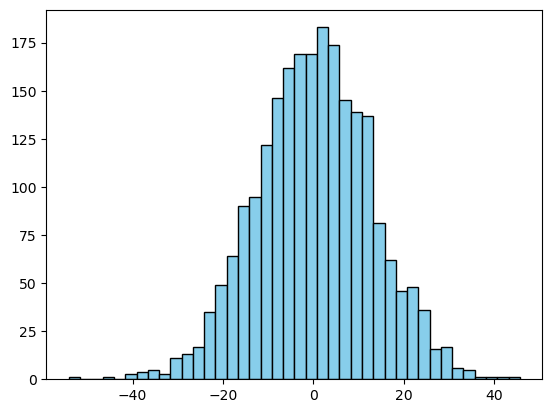

In [166]:
# Plotting a basic histogram
import matplotlib.pyplot as plt
plt.hist(ResultsFrame['Error'], bins=40, color='skyblue', edgecolor='black')

(array([196., 187., 182., 190., 173., 166., 145., 132., 130., 134.,  91.,
         87.,  60.,  73.,  55.,  52.,  39.,  43.,  26.,  17.,  17.,  15.,
         14.,   8.,   6.,   5.,   3.,   3.,   2.,   3.,   1.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.22592405e-04, 1.35302773e+00, 2.70593288e+00, 4.05883802e+00,
        5.41174316e+00, 6.76464830e+00, 8.11755344e+00, 9.47045858e+00,
        1.08233637e+01, 1.21762689e+01, 1.35291740e+01, 1.48820792e+01,
        1.62349843e+01, 1.75878894e+01, 1.89407946e+01, 2.02936997e+01,
        2.16466049e+01, 2.29995100e+01, 2.43524151e+01, 2.57053203e+01,
        2.70582254e+01, 2.84111306e+01, 2.97640357e+01, 3.11169409e+01,
        3.24698460e+01, 3.38227511e+01, 3.51756563e+01, 3.65285614e+01,
        3.78814666e+01, 3.92343717e+01, 4.05872768e+01, 4.19401820e+01,
        4.32930871e+01, 4.46459923e+01, 4.59988974e+01, 4.73518026e+01,
        4.87047077e+01, 5.00576128e+01, 5.14105180e+01, 5.27634231e+01,
      

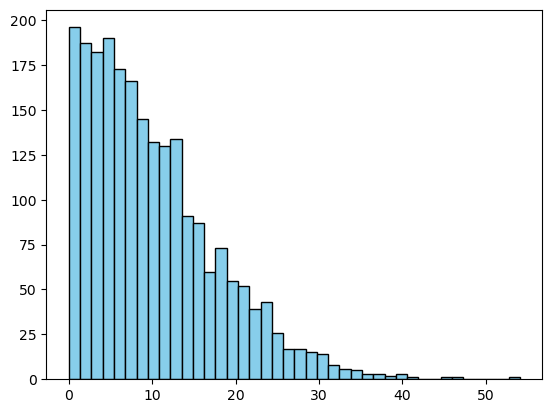

In [168]:
plt.hist(ResultsFrame['Abs Error'], bins=40, color='skyblue', edgecolor='black')

## End of Testing Notebook